In [1]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [2]:
# imports
import time
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from stable_baselines3.common.env_checker import check_env

from environments.discrete_env_v0 import DiscretePortfolioEnv
from environments.discrete_env_faster import DiscretePortfolioEnvFaster
from environments.discrete_env_v1 import DiscretePortfolioTrainEnv

c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
returns_df = pd.read_csv('data/returns_toy_dataset.csv', index_col='Date', parse_dates=True)
returns_df_with_numerical_index = returns_df.reset_index()
display(returns_df.head())
display(returns_df_with_numerical_index.head())

,AAPL,GOOGL,MSFT
Date,,,
2022-01-04,-0.012692,-0.004083,-0.017147
2022-01-05,-0.026600,-0.045876,-0.038388
2022-01-06,-0.016693,-0.000200,-0.007902
2022-01-07,0.000988,-0.005303,0.000510
2022-01-10,0.000116,0.012061,0.000732


,Date,AAPL,GOOGL,MSFT
0,2022-01-04,-0.012692,-0.004083,-0.017147
1,2022-01-05,-0.026600,-0.045876,-0.038388
2,2022-01-06,-0.016693,-0.000200,-0.007902
3,2022-01-07,0.000988,-0.005303,0.000510
4,2022-01-10,0.000116,0.012061,0.000732


In [4]:
# np.random.seed(0)

# env = DiscretePortfolioEnv(returns_df_with_numerical_index, episode_length=90)

# episodes = 100
# running_times = []

# for episode in tqdm(range(episodes)):
    
#     start_time = time.time()
    
#     obs = env.reset()
#     done = False
#     while not done:
#         action = np.random.randint(env.action_space.n)
#         obs, reward, done, info = env.step(action)
    
#     end_time = time.time()
#     running_times.append(end_time - start_time)

# plt.plot(range(1, episodes+1), running_times);
# plt.xlabel('Episode Number');
# plt.ylabel('Running Time (s)');
# plt.title(f'Average: {np.mean(running_times)}')

100%|██████████| 100/100 [00:02<00:00, 34.29it/s]


Text(0.5, 1.0, 'Average: 0.028939130306243895')

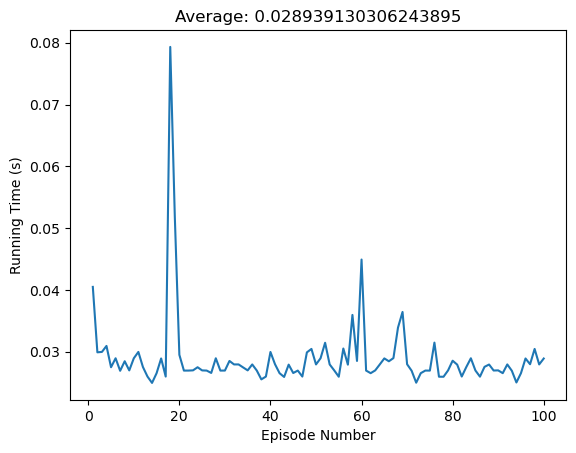

In [5]:
np.random.seed(0)

env = DiscretePortfolioTrainEnv(returns_df, episode_length=90)

episodes = 100
running_times = []

for episode in tqdm(range(episodes)):
    
    start_time = time.time()
    
    obs = env.reset()
    done = False
    while not done:
        action = np.random.randint(env.action_space.n)
        obs, reward, done, info = env.step(action)
    
    end_time = time.time()
    running_times.append(end_time - start_time)

plt.plot(range(1, episodes+1), running_times);
plt.xlabel('Episode Number');
plt.ylabel('Running Time (s)');
plt.title(f'Average: {np.mean(running_times)}')

In [13]:
# testing mode
np.random.seed(0)
env = DiscretePortfolioTrainEnv(returns_df, episode_length=90)

obs = env.reset()
done = False
while not done:
    action = np.random.randint(env.action_space.n)
    obs, reward, done, info = env.step(action)
    env.render()

1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
999.638554787643
997.3233232341679
1008.3728307213955
1012.6455579387784
1017.8281311087217
1015.9242803200107
1014.2760336762715
1020.7543111224073
1020.557691989822
1020.1496826010238
1017.9856768618781
1018.7355855068325
1023.8796921682134
1021.9325826813558
1025.8632216638607
1027.3984270485848
1026.9837029098446
1027.8858753020068
1027.4147567884463
1024.3115851509085
1019.5937413455132
1019.1799789548389
1019.3934736630071
1026.22100338783
1012.932262059138
1010.7009743818674
1008.7106845845465
1006.9712422582372
1007.4452062825891
1006.0739646266646
1004.2772959961917
1007.6889046572188
1005.7345885442584
1012.0467369816591
1016.1359973876104
1010.1733546416402
1011.1386164640388
1009.2245379259465
1008.1184142932975
1008.1184142932975
1009.6976873443986
1007.6512651535081
1007.8649115389571
1005.0608373349877
1004.8622897266256
1005.0820014867786
1007.0631795593306
1007.0631795593306
1007.0631795593306
1010.1601563108793
1015.8207646572

In [16]:
# testing mode
np.random.seed(0)
env = DiscretePortfolioEnv(returns_df_with_numerical_index, episode_length=90)

obs = env.reset()
done = False
while not done:
    action = np.random.randint(env.action_space.n)
    obs, reward, done, info = env.step(action)

print(env.current_balance)

840.9372021714632


The decreased running time is because we don't slice the dataframe with `self.ASSETS`